<a href="https://colab.research.google.com/github/alzaidawi/PORTAL_code/blob/main/pixels_seg_ML_to_predict_different_pores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


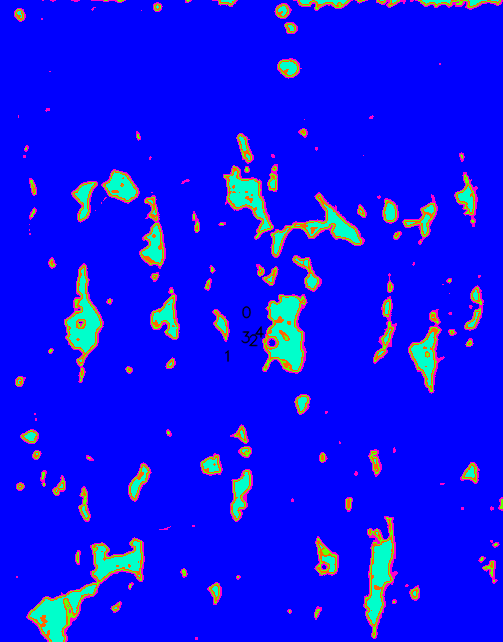

In [17]:

import numpy as np
import cv2
from sklearn.cluster import KMeans
import random
from matplotlib.colors import hsv_to_rgb
from google.colab.patches import cv2_imshow

def preprocess_image(image_path):
    # Load image and convert it to a 2D numpy array
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    pixels = np.reshape(image, (height * width, 3))
    return pixels, height, width

def cluster_microobjects(image_path, num_clusters):
    # Preprocess the image
    pixels, height, width = preprocess_image(image_path)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pixels)

    # Get cluster assignments for each pixel
    cluster_assignments = kmeans.labels_

    # Reshape the cluster assignments to the original image shape
    clustered_image = np.reshape(cluster_assignments, (height, width))

    return clustered_image, num_clusters

def label_clustered_classes(clustered_image, num_clusters):
    # Create a color map to assign colors to clusters
    colors = [hsv_to_rgb([i / num_clusters, 1.0, 1.0]) for i in range(num_clusters)]
    labeled_image = np.zeros((clustered_image.shape[0], clustered_image.shape[1], 3), dtype=np.uint8)

    # Assign colors to each cluster in the labeled image and add labels
    for i in range(num_clusters):
        mask = (clustered_image == i)
        labeled_image[mask] = (colors[i][0] * 255, colors[i][1] * 255, colors[i][2] * 255)
        if mask.sum() > 0:
            # Get the center of the cluster for adding the label
            y, x = np.mean(np.where(mask), axis=1)
            x, y = int(x), int(y)

            # Add the cluster number as text
            cv2.putText(labeled_image, str(i), (x - 10, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    return labeled_image

# Example usage
if __name__ == "__main__":
    image_path = "/content/new_cropped_001.jpg"
    num_clusters = 5
    clustered_image, num_clusters = cluster_microobjects(image_path, num_clusters)

    # Label the clustered classes by coloring them
    labeled_clusters_image = label_clustered_classes(clustered_image, num_clusters)

    # Display the labeled clustered image
    cv2_imshow(labeled_clusters_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#•	Gas pore:  circularity > 0.80
#•	Crack pore:  aspect ratio > 3.5  and circularity < 0.35
#•	Process pores: small pores (use area threshold)
#•	Un-melted particle (inside the pore there is a defect)
#•	Lack of fusion pore:  (high convexities)
#•	all other defects it can be: Keyhole pore



****************** Distribution of Variance of the Process pores area ***********************
mean 21.058333333333334
min 1.5
max 59.5
median 14.5
sd 15.878730970144378
count process pores 60
my_mean_plus_sd 68.69452624376648


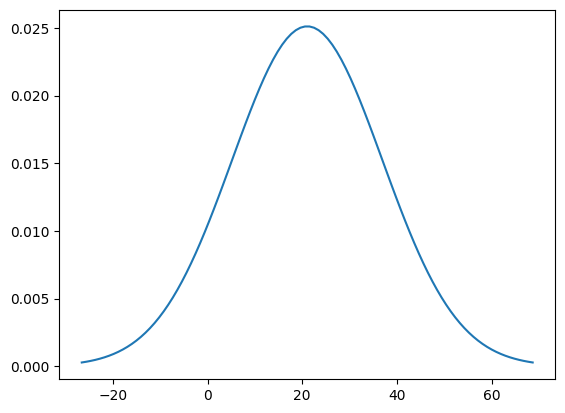

****************** Distribution of Variance of the Process pores area ***********************
(1 sigma) mean_plus_sd = 36.93706430347771
(2 sigma) mean_plus_sd = 52.815795273622086
(3 sigma) mean_plus_sd =  68.69453


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
print('****************** Distribution of Variance of the Process pores area ***********************')
# area=[12.5,23.5,80.0,90.0,28.0,138.0,11.0,229.0,36.0,2.0,23.5,59.5,188.0,38.5,80.5,35.5,10.0,647.0,10.5,4.0,10.0,7.0,2291.5,16.5,12.5,14.0,111.5,292.0,10.0,73.5,177.5,17.0,89.0,797.0,288.0,499.5,41.5,393.5,76.0,82.5,249.0,15.5,139.0,7.0,37.0,222.0,196.5,7.0,4.0,8.5,271.5,102.5,51.5,92.5,32.5,59.0,56.0,1260.5,12.5,135.5,332.5,15.0,35.0,643.5,2751.5,29.0,894.5,459.0,82.5,32.0,69.0,11.0,6.0,72.0,188.0,41.5,92.5,7.0,2212.0,1.5,75.5,500.5,63.5,33.5,46.5,4.0,125.5,62.0,101.0,344.5,11.0,669.0,1116.5,1908.5,629.5,25.0,106.0,617.0,866.0,39.5,1727.0,252.5,10.0,9.5,16.0,44.5,12.5,29.5,328.5,41.0,69.5,2.0,13.5,2.0,18.0,384.0,148.0,7.0,7.0,135.0,218.5,86.0]
# print('mean',np.mean(area))
# print('min',np.min(area))
# print('max',np.max(area))
# print('var',np.var(area))
# print('median',np.median(area))
# print('sd',np.std(area))
# print('count', len(area))
# for i in area:
#   if i < 62:
#     print(i)
area_less_median=[12.5,23.5,28.0,11.0,36.0,2.0,23.5,59.5,38.5,35.5,10.0,10.5,4.0,10.0,7.0,16.5,12.5,14.0,10.0,17.0,41.5,15.5,7.0,37.0,7.0,4.0,8.5,51.5,32.5,59.0,56.0,12.5,15.0,35.0,29.0,32.0,11.0,6.0,41.5,7.0,1.5,33.5,46.5,4.0,11.0,25.0,39.5,10.0,9.5,16.0,44.5,12.5,29.5,41.0,2.0,13.5,2.0,18.0,7.0,7.0]
print('mean',np.mean(area_less_median))
print('min',np.min(area_less_median))
print('max',np.max(area_less_median))
# print('var',np.var(area_less_median))
print('median',np.median(area_less_median))
print('sd',np.std(area_less_median))
print('count process pores', len(area_less_median))
# for i in area_less_median:
#   if i < 14:
#     print(i)
# area_sec_less_median=[12.5,11.0,2.0,10.0,10.5,4.0,10.0,7.0,12.5,10.0,7.0,7.0,4.0,8.5,12.5,11.0,6.0,7.0,1.5,4.0,11.0,10.0,9.5,12.5,2.0,13.5,2.0,7.0,7.0]
# print('mean',np.mean(area_sec_less_median))
# print('min',np.min(area_sec_less_median))
# print('max',np.max(area_sec_less_median))
# print('var',np.var(area_sec_less_median))
# print('median',np.median(area_sec_less_median))
# print('sd',np.std(area_sec_less_median))
# print('count', len(area_sec_less_median))

my_mean_minus_sd = np.mean(area_less_median) - 3*np.std(area_less_median)
my_mean_plus_sd = np.mean(area_less_median) + 3*np.std(area_less_median)

#print('my_mean_minus_sd',my_mean_minus_sd)
print('my_mean_plus_sd',my_mean_plus_sd)

# for i in area_sec_less_median:
#   if i < 8:
#     print(i)
# mu = 0.0000859  # mean pore area in mm
# variance = 0.0000000103 # var of the area pore

# mu = 24.052  # mean pore area in pixels for process_pore_area_inpixel
# variance = 28.422185137670187 # var of the area pore in pixels for process_pore_area_inpixel
# sigma = math.sqrt(variance)
mu = np.mean(area_less_median)
sigma = np.std(area_less_median)
x_coor = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
##x_coor = np.linspace(0, mu + 3*sigma, 100)
plt.plot(x_coor, stats.norm.pdf(x_coor, mu, sigma))
plt.show()
mean_minus_sd = mu - 3*sigma
mean_plus_sd = mu + 3*sigma
mean_plus_sd_2 =  mu + 2*sigma
mean_plus_sd_1 = mu + 1*sigma
# print('mean_minus_sd',round(mean_minus_sd,5))
print('****************** Distribution of Variance of the Process pores area ***********************')
print('(1 sigma) mean_plus_sd =',mean_plus_sd_1)
print('(2 sigma) mean_plus_sd =',mean_plus_sd_2)
print('(3 sigma) mean_plus_sd = ',round(mean_plus_sd,5))

# print('1 sigma=',round(0.00018771100000000002,5))
#print(0.0000859 + 0.000101811)


# process_pore_area_inpixel=[1.25E+01,2.10E+01,5.49E+00,9.99E+00,3.10E+01,1.60E+01,9.99E+00,1.65E+01,1.10E+01,3.40E+01,4.00E+00,4.00E+00,2.00E+00,2.05E+01,1.40E+01,1.13E+02,2.10E+01,7.00E+00,2.55E+01,2.50E+01,5.49E+00,1.90E+01,1.70E+01,5.60E+01,5.05E+01,5.49E+00,2.00E+00,6.85E+01,1.25E+01,7.85E+01,1.35E+01,2.00E+00,2.00E+00,8.35E+01,9.99E+00,9.49E+00,8.99E+00,2.00E+00,2.95E+01,3.35E+01,5.99E+00,1.10E+01,7.00E+00,2.15E+01,6.60E+01,1.50E+01,1.85E+01,1.62E+02,4.55E+01,2.00E+00,2.00E+00,4.40E+01,1.50E+01,2.25E+01,9.99E+00,1.86E+02,2.35E+01,1.90E+01,2.40E+01,7.00E+00,3.65E+01,3.95E+01,4.80E+01,3.55E+01,6.60E+01,4.50E+01,2.00E+00,1.15E+01,1.11E+02,2.00E+00,1.40E+01,2.10E+01,4.10E+01,2.40E+01,8.51E+00,8.30E+01,2.40E+01,7.00E+00,3.35E+01,1.25E+01,4.00E+00,2.90E+01,2.40E+01,8.51E+00,2.00E+00,2.00E+00,4.25E+01,3.05E+01,3.30E+01,2.00E+00,1.04E+02,1.20E+01,1.25E+01,2.85E+01,1.50E+01,2.65E+01,2.00E+00,2.00E+00,7.00E+00,2.25E+01,2.30E+01,5.49E+00,5.95E+01,1.35E+01,8.51E+00,1.13E+02,7.00E+00,1.25E+01,2.00E+00,8.45E+01,3.55E+01,5.80E+01,8.20E+01,1.85E+01,2.10E+01,5.10E+01,2.00E+00,2.20E+01,1.35E+01,1.25E+01,3.65E+01,3.65E+01,9.99E+00,4.00E+00,1.50E+01,2.00E+00,7.00E+00,7.20E+01,1.30E+01,6.20E+01,4.00E+00,8.51E+00,6.05E+01,2.00E+00,2.65E+01,8.51E+00,2.00E+00,8.51E+00,7.40E+01,2.05E+01,7.00E+00,2.00E+00,2.35E+01,2.00E+00,4.25E+01,1.65E+01,6.00E+01,7.00E+00,5.35E+01,4.35E+01,7.00E+00,2.00E+00,5.99E+00,2.45E+01,1.20E+01,6.10E+01,5.70E+01,5.49E+00,2.70E+01,2.00E+00,1.45E+01,9.99E+00,2.00E+00,2.00E+00,5.49E+00,7.00E+00,4.00E+00,1.75E+01,2.00E+00,1.50E+01,1.55E+01,2.00E+00,8.51E+00,2.85E+01,1.65E+01,2.00E+00,4.00E+00,2.25E+01,2.00E+00,2.00E+00,2.00E+00,5.49E+00,2.00E+00,1.50E+01,7.00E+00,2.00E+00,2.75E+01,2.00E+00,4.00E+00,4.00E+00,7.50E+00,4.00E+00,4.25E+01,1.40E+01,4.00E+00,7.00E+01,4.45E+01,4.00E+00,4.00E+00,8.70E+01]
# print('mean',np.mean(process_pore_area_inpixel))
# print('min',np.min(process_pore_area_inpixel))
# print('max',np.max(process_pore_area_inpixel))
# # print('var',np.var(process_pore_area_inpixel))
# print('median',np.median(process_pore_area_inpixel))
# print('sd',np.std(process_pore_area_inpixel))
# print('count', len(process_pore_area_inpixel))

# process_pore_mean_minus_sd = np.mean(process_pore_area_inpixel) - 3*np.std(process_pore_area_inpixel)
# process_pore_mean_plus_sd = np.mean(process_pore_area_inpixel) + 3*np.std(process_pore_area_inpixel)
# # print('process_pore_mean_minus_sd',process_pore_mean_minus_sd)
# print('process_pore_mean_plus_sd',process_pore_mean_plus_sd)


count pores 112
1std 0.142
2std 0.283
3std 0.425
4std 0.566
mu 1.087
mu + 1std = 1.228
mu + 2std = 1.37
mu + 3std = 1.512
mu + 4std = 1.653
mu - 1std = 0.945
mu - 2std = 0.804
mu - 3std = 0.662
mu - 4std = 0.521


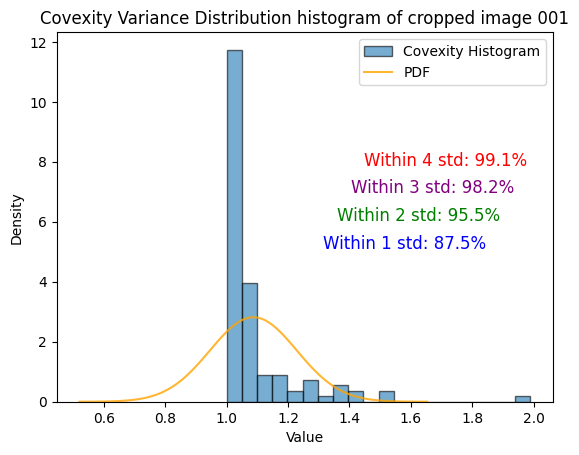

In [16]:
# The variance distribution plot of the pore convexity
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# the pore convexity of the cropped 001 image (it has 122 pores)
data=[1.0, 1.0, 1.0875, 1.0833333333333333, 1.0, 1.0507246376811594, 1.0, 1.1091703056768558, 1.0555555555555556, 1.0, 1.0756302521008403, 1.3377659574468086, 1.025974025974026, 1.0869565217391304, 1.028169014084507, 1.0, 1.0, 1.0, 1.0, 1.353043857735108, 1.0, 1.0, 1.0, 1.0717488789237668, 1.2380136986301369, 1.0, 1.034013605442177, 1.1746478873239437, 1.0588235294117647, 1.2078651685393258, 1.1662484316185697, 1.1006944444444444, 1.1361361361361362, 1.0240963855421688, 1.050825921219822, 1.013157894736842, 1.0484848484848486, 1.1646586345381527, 1.064516129032258, 1.0467625899280575, 1.0, 1.027027027027027, 1.0337837837837838, 1.1552162849872774, 1.0, 1.0, 1.0, 1.0386740331491713, 1.048780487804878, 1.0776699029126213, 1.037837837837838, 1.0, 1.0169491525423728, 1.0267857142857142, 1.2856009520031733, 1.0, 1.084870848708487, 1.1338345864661654, 1.0, 1.0285714285714285, 1.529137529137529, 1.2487423141419787, 1.4052287581699345, 1.0363636363636364, 1.015625, 1.0289855072463767, 1.0, 1.0, 1.0555555555555556, 1.148936170212766, 1.0, 1.0810810810810811, 1.0, 1.0662251655629138, 1.3696303696303695, 1.031496062992126, 1.0, 1.075268817204301, 1.0, 1.1394422310756973, 1.0564516129032258, 1.0445544554455446, 1.0377358490566038, 1.0, 1.5097159940209268, 1.3502015226153157, 1.988996594183914, 1.254964257347101, 1.08, 1.070754716981132, 1.2690437601296596, 1.0548498845265588, 1.0126582278481013, 1.4157498552403012, 1.0, 1.0, 1.03125, 1.0449438202247192, 1.0, 1.0338983050847457, 1.095890410958904, 1.048780487804878, 1.0575539568345325, 1.0, 1.0, 1.0260416666666667, 1.0405405405405406, 1.0, 1.0, 1.011111111111111, 1.0389016018306636, 1.0348837209302326]

# the pore convexity of the 200 images of each keyhole and LOF
# keyhole convexity:
#data = [1.018831169,1.01821366,1.016085621,1.015879104,1.025,1.02733119,1.052867932,1.019930852,1.029776853,1.022882848,1.037433155,1.027672956,1.014377382,1.025986761,1.024048349,1.04,1.017741438,1.025,1.013511063,1.012928191,1.015287099,1.02196925,1.014569983,1.014975845,1.037515843,1.024615385,1.019768563,1.024801929,1.049522944,1.03333082,1.031569328,1.040871236,1.015054695,1.024924319,1.03384207,1.026406126,1.012571003,1.02698295,1.022259748,1.035065158,1.031092338,1.021180486,1.032331903,1.016738841,1.03864189,1.023529412,1.016831028,1.024382856,1.026160338,1.022852512,1.026282323,1.012768709,1.029382765,1.050833098,1.030296378,1.022403032,1.029374738,1.02217018,1.01794318,1.018716325,1.024062432,1.030034236,1.034524218,1.016182048,1.025039957,1.02254902,1.043301759,1.035339534,1.035336672,1.026683882,1.044236495,1.019013666,1.101796407,1.029380227,1.015773354,1.062815222,1.015003642,1.024220406,1.014885061,1.049772612,1.022820884,1.024169867,1.051241248,1.019386878,1.041697326,1.015446755,1.020712845,1.027153121,1.011082694,1.017340904,1.010548917,1.036677454,1.010764263,1.033764068,1.025584795,1.020689655,1.03285942,1.017131394,1.014285714,1.022592905,1.015774572,1.029146538,1.042262123,1.025406172,1.019112963,1.014139591,1.026338004,1.021411134,1.020539153,1.027964507,1.029771791,1.021881791,1.021609195,1.047371836,1.016968145,1.055448409,1.018832392,1.029234339,1.045454545,1.042083114,1.025986054,1.027247706,1.025595401,1.024507887,1.016768559,1.058937824,1.013665245,1.03372299,1.030670471,1.021460177,1.012194075,1.064400459,1.019254155,1.028593135,1.03071107,1.032645403,1.037378115,1.012481089,1.014840625,1.022147651,1.014762165,1.019537337,1.035873049,1.017760058,1.026644916,1.023265142,1.01794439,1.033232289,1.02210552,1.014982142,1.017115472,1.048138056,1.016395909,1.023731544,1.036447979,1.021892655,1.028689857,1.025075049,1.012287335,1.011824778,1.054274084,1.020004588,1.021957914,1.039875251,1.037387387,1.057803468,1.024390244,1.012151537,1.017231476,1.014426786,1.02181752,1.037946429,1.02566953,1.033056018,1.051383183,1.016816517,1.017064307,1.033902499,1.027796272,1.034707664,1.012288276,1.031068624,1.025583982,1.028760704,1.013267166,1.032558851,1.02643653,1.019994668,1.027955147,1.025925926,1.019548219,1.021592966,1.025145661,1.013421381,1.032484979,1.021025947,1.021461187,1.015217679,1.026019533,1.01443299]
# LOF convexity:
#data = [1.378387611,1.257624633,1.646088225,1.491178393,1.365940851,1.76239713,1.310879616,1.266048747,1.43769609,1.265837704,1.41781223,1.453594771,1.871769076,1.192589875,1.351175657,1.25651641,1.174329502,1.655523745,1.470752089,1.176037118,1.389136106,1.449586777,1.477689617,1.218839082,1.449936275,1.168319088,1.166968941,1.240950753,1.177164397,1.208533899,1.362085613,1.972882928,1.526847291,1.215551181,1.238571905,1.275331823,1.92553622,1.12398374,1.183185499,1.739386022,1.311773886,1.546539379,1.168230144,1.136801185,1.06206089,1.343096234,1.350472715,1.318978659,1.435883015,1.410874898,1.501575113,1.358359191,1.449015557,1.256976194,1.882408789,1.770755306,1.53353489,1.265586035,1.2027425,1.222180232,1.678721528,1.344368812,1.679361859,1.412044374,1.4908867,1.216589067,1.562291656,1.273482659,1.492642317,1.680931744,1.971698113,1.067851778,3.045118308,1.315176177,1.549923195,1.227111233,1.443293464,2.135256508,1.181071519,1.491822476,1.100119693,1.561710899,1.389568052,1.403299293,1.223846392,1.065005417,1.680936073,1.900764749,1.710459645,1.552328498,1.738244358,1.201285117,1.861966717,1.319774466,1.49962614,1.21213328,1.429771909,1.165128109,1.585429242,1.212340189,2.145148771,1.163454501,1.234755504,1.286632073,1.316500994,1.402958978,1.28639329,1.724985248,1.681451613,1.134511469,1.088954538,1.372787051,1.35007593,1.258425959,1.044760936,1.191186923,1.717561859,1.115363881,1.10006092,1.594989562,1.248235294,1.899118132,1.169516122,1.451594414,1.646555413,1.259513151,1.617762641,1.628673835,2.177696148,1.381598793,1.199217835,1.747238401,1.442551712,1.144040581,1.810240964,1.16150953,1.438990426,1.229479479,1.132358226,1.363160953,1.673485739,1.105680934,1.251738526,1.633227513,1.870254685,1.239889475,1.414791626,1.269221835,1.583567163,1.349974723,1.970804369,1.479591837,2.552362054,1.365709567,1.104166667,1.171793847,1.424510015,1.182524537,1.547213031,1.668131732,1.234785893,1.298234748,1.297139354,1.273319129,1.762113905,1.397592874,1.336639615]
print('count pores', len(data))

n_bins = 20

# Calculate mean and standard deviation
mu, sigma = np.mean(data), np.std(data)

# Generate points for the PDF plot
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Create the histogram
n, bins, patches = plt.hist(data, bins=n_bins, density=True, alpha=0.6, edgecolor='black', label='Covexity Histogram')

# Plot the PDF
plt.plot(x, pdf, color='orange', alpha=0.8, label='PDF')

# Calculate cumulative percentage within 1st, 2nd, and 3rd standard deviations from the mean
within_1std = np.sum(np.abs(data - mu) <= sigma) / len(data)
within_2std = np.sum(np.abs(data - mu) <= 2 * sigma) / len(data)
within_3std = np.sum(np.abs(data - mu) <= 3 * sigma) / len(data)
within_4std = np.sum(np.abs(data - mu) <= 4 * sigma) / len(data)
print('1std',round(sigma,3))
print('2std',round(2 * sigma,3))
print('3std',round(3 * sigma,3))
print('4std',round(4 * sigma,3))
print('mu',round(mu,3))

print('mu + 1std =',round(mu + sigma,3))
print('mu + 2std =',round(mu + (2 * sigma),3))
print('mu + 3std =',round(mu + (3 * sigma),3))
print('mu + 4std =',round(mu + (4 * sigma),3))

print('mu - 1std =',round(mu - sigma,3))
print('mu - 2std =',round(mu - (2 * sigma),3))
print('mu - 3std =',round(mu - (3 * sigma),3))
print('mu - 4std =',round(mu - (4 * sigma),3))

# Annotate percentages on the histogram
plt.annotate(f'Within 1 std: {within_1std * 100:.1f}%', xy=(mu, 0.01), xytext=(50, 110),
             textcoords='offset points', ha='left', fontsize=12, color='blue')
plt.annotate(f'Within 2 std: {within_2std * 100:.1f}%', xy=(mu, 0.01), xytext=(60, 130),
             textcoords='offset points', ha='left', fontsize=12, color='green')
plt.annotate(f'Within 3 std: {within_3std * 100:.1f}%', xy=(mu, 0.01), xytext=(70, 150),
             textcoords='offset points', ha='left', fontsize=12, color='purple')
plt.annotate(f'Within 4 std: {within_4std * 100:.1f}%', xy=(mu, 0.01), xytext=(80, 170),
             textcoords='offset points', ha='left', fontsize=12, color='red')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Covexity Variance Distribution histogram of cropped image 001')
plt.legend()

plt.show()





count pores 60
1std 15.879
2std 31.757
3std 47.636
4std 63.5149
mu 21.058
mu + 1std = 36.937
mu + 2std = 52.816
mu + 3std = 68.695
mu + 4std = 84.573
mu - 1std = 5.18
mu - 2std = -10.699
mu - 3std = -26.578
mu - 4std = -42.457


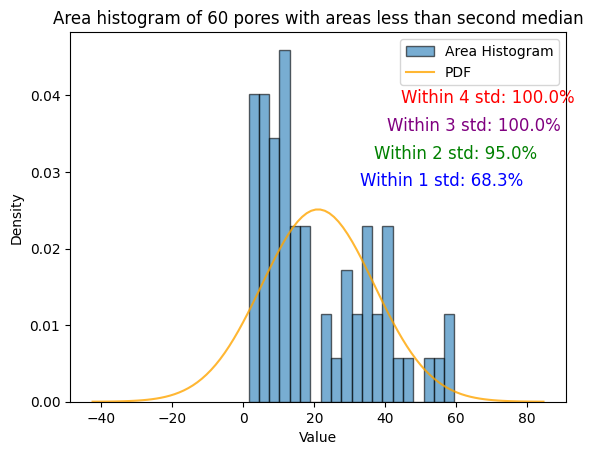

In [17]:
# The variance distribution plot of the pore area
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# the pore area of the cropped image 001 for 60pores less than the second median of the area
data = [12.5, 23.5, 28.0, 11.0, 36.0, 2.0, 23.5, 59.5, 38.5, 35.5, 10.0, 10.5, 4.0, 10.0, 7.0, 16.5, 12.5, 14.0, 10.0, 17.0, 41.5, 15.5, 7.0, 37.0, 7.0, 4.0, 8.5, 51.5, 32.5, 59.0, 56.0, 12.5, 15.0, 35.0, 29.0, 32.0, 11.0, 6.0, 41.5, 7.0, 1.5, 33.5, 46.5, 4.0, 11.0, 25.0, 39.5, 10.0, 9.5, 16.0, 44.5, 12.5, 29.5, 41.0, 2.0, 13.5, 2.0, 18.0, 7.0, 7.0]
# the pore area of the full image 001 for 224 pores less than the second median of the area
#data= [3.0, 0.5, 5.5, 2.5, 0.5, 8.5, 13.5, 18.0, 5.5, 38.5, 34.0, 2.0, 2.0, 7.0, 10.0, 11.0, 8.5, 14.0, 13.0, 32.0, 42.0, 8.0, 20.0, 32.0, 4.0, 15.0, 7.0, 8.5, 41.5, 2.0, 15.0, 39.0, 38.5, 25.0, 22.5, 12.0, 4.0, 7.0, 16.5, 8.5, 31.0, 15.0, 31.0, 4.0, 5.5, 40.0, 5.5, 18.5, 27.5, 27.0, 27.5, 5.0, 3.5, 44.5, 27.5, 4.0, 18.0, 4.0, 14.5, 39.5, 17.5, 5.5, 20.0, 2.0, 2.0, 23.0, 8.0, 11.5, 2.0, 13.5, 13.5, 45.0, 20.0, 22.5, 5.5, 11.0, 8.5, 19.5, 17.5, 7.0, 35.5, 15.5, 11.0, 23.5, 7.0, 18.5, 7.0, 41.5, 18.5, 16.0, 8.5, 12.5, 34.5, 27.5, 28.0, 2.0, 8.5, 12.5, 22.5, 23.5, 23.5, 10.0, 25.5, 12.5, 12.5, 13.5, 39.5, 2.0, 24.5, 33.5, 11.5, 39.0, 27.5, 5.5, 5.5, 38.0, 5.5, 10.0, 9.5, 7.0, 15.0, 4.0, 7.0, 2.0, 14.0, 22.0, 11.0, 16.5, 14.0, 5.5, 14.0, 2.0, 19.5, 10.0, 10.0, 21.0, 12.5, 17.0, 5.5, 41.5, 14.5, 15.5, 7.0, 23.5, 38.5, 7.0, 4.0, 4.0, 7.0, 8.5, 11.0, 15.0, 26.5, 20.5, 32.5, 8.5, 2.0, 15.0, 19.5, 11.0, 15.0, 16.0, 23.5, 35.0, 29.0, 28.0, 18.5, 28.5, 11.0, 6.0, 4.0, 41.5, 2.0, 34.0, 7.0, 1.5, 10.0, 7.0, 5.5, 32.0, 12.5, 7.0, 4.0, 33.5, 45.5, 39.0, 4.0, 11.0, 5.5, 2.0, 10.0, 23.5, 26.5, 17.0, 24.0, 38.5, 44.5, 19.0, 7.0, 9.5, 17.5, 42.0, 8.5, 12.5, 31.0, 20.5, 41.0, 2.0, 2.0, 2.0, 16.5, 18.0, 8.0, 40.5, 2.0, 2.0, 34.5, 7.0, 20.0, 7.0, 7.0, 2.0, 2.0, 10.0]
# the pore area of the 200 images of each process pore (in pixels)
#data = [1.25E+01,2.10E+01,5.49E+00,9.99E+00,3.10E+01,1.60E+01,9.99E+00,1.65E+01,1.10E+01,3.40E+01,4.00E+00,4.00E+00,2.00E+00,2.05E+01,1.40E+01,1.13E+02,2.10E+01,7.00E+00,2.55E+01,2.50E+01,5.49E+00,1.90E+01,1.70E+01,5.60E+01,5.05E+01,5.49E+00,2.00E+00,6.85E+01,1.25E+01,7.85E+01,1.35E+01,2.00E+00,2.00E+00,8.35E+01,9.99E+00,9.49E+00,8.99E+00,2.00E+00,2.95E+01,3.35E+01,5.99E+00,1.10E+01,7.00E+00,2.15E+01,6.60E+01,1.50E+01,1.85E+01,1.62E+02,4.55E+01,2.00E+00,2.00E+00,4.40E+01,1.50E+01,2.25E+01,9.99E+00,1.86E+02,2.35E+01,1.90E+01,2.40E+01,7.00E+00,3.65E+01,3.95E+01,4.80E+01,3.55E+01,6.60E+01,4.50E+01,2.00E+00,1.15E+01,1.11E+02,2.00E+00,1.40E+01,2.10E+01,4.10E+01,2.40E+01,8.51E+00,8.30E+01,2.40E+01,7.00E+00,3.35E+01,1.25E+01,4.00E+00,2.90E+01,2.40E+01,8.51E+00,2.00E+00,2.00E+00,4.25E+01,3.05E+01,3.30E+01,2.00E+00,1.04E+02,1.20E+01,1.25E+01,2.85E+01,1.50E+01,2.65E+01,2.00E+00,2.00E+00,7.00E+00,2.25E+01,2.30E+01,5.49E+00,5.95E+01,1.35E+01,8.51E+00,1.13E+02,7.00E+00,1.25E+01,2.00E+00,8.45E+01,3.55E+01,5.80E+01,8.20E+01,1.85E+01,2.10E+01,5.10E+01,2.00E+00,2.20E+01,1.35E+01,1.25E+01,3.65E+01,3.65E+01,9.99E+00,4.00E+00,1.50E+01,2.00E+00,7.00E+00,7.20E+01,1.30E+01,6.20E+01,4.00E+00,8.51E+00,6.05E+01,2.00E+00,2.65E+01,8.51E+00,2.00E+00,8.51E+00,7.40E+01,2.05E+01,7.00E+00,2.00E+00,2.35E+01,2.00E+00,4.25E+01,1.65E+01,6.00E+01,7.00E+00,5.35E+01,4.35E+01,7.00E+00,2.00E+00,5.99E+00,2.45E+01,1.20E+01,6.10E+01,5.70E+01,5.49E+00,2.70E+01,2.00E+00,1.45E+01,9.99E+00,2.00E+00,2.00E+00,5.49E+00,7.00E+00,4.00E+00,1.75E+01,2.00E+00,1.50E+01,1.55E+01,2.00E+00,8.51E+00,2.85E+01,1.65E+01,2.00E+00,4.00E+00,2.25E+01,2.00E+00,2.00E+00,2.00E+00,5.49E+00,2.00E+00,1.50E+01,7.00E+00,2.00E+00,2.75E+01,2.00E+00,4.00E+00,4.00E+00,7.50E+00,4.00E+00,4.25E+01,1.40E+01,4.00E+00,7.00E+01,4.45E+01,4.00E+00,4.00E+00,8.70E+01]
print('count pores', len(data))

n_bins = 20

# Calculate mean and standard deviation
mu, sigma = np.mean(data), np.std(data)

# Generate points for the PDF plot
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Create the histogram
n, bins, patches = plt.hist(data, bins=n_bins, density=True, alpha=0.6, edgecolor='black', label='Area Histogram')

# Plot the PDF
plt.plot(x, pdf, color='orange', alpha=0.8, label='PDF')

# Calculate cumulative percentage within 1st, 2nd, and 3rd standard deviations from the mean
within_1std = np.sum(np.abs(data - mu) <= sigma) / len(data)
within_2std = np.sum(np.abs(data - mu) <= 2 * sigma) / len(data)
within_3std = np.sum(np.abs(data - mu) <= 3 * sigma) / len(data)
within_4std = np.sum(np.abs(data - mu) <= 4 * sigma) / len(data)

print('1std',round(sigma,3))
print('2std',round(2 * sigma,3))
print('3std',round(3 * sigma,3))
print('4std',round(4 * sigma,4))
print('mu',round(mu,3))

print('mu + 1std =',round(mu + sigma,3))
print('mu + 2std =',round(mu + (2 * sigma),3))
print('mu + 3std =',round(mu + (3 * sigma),3))
print('mu + 4std =',round(mu + (4 * sigma),3))

print('mu - 1std =',round(mu - sigma,3))
print('mu - 2std =',round(mu - (2 * sigma),3))
print('mu - 3std =',round(mu - (3 * sigma),3))
print('mu - 4std =',round(mu - (4 * sigma),3))

# Annotate percentages on the histogram
plt.annotate(f'Within 1 std: {within_1std * 100:.1f}%', xy=(mu, 0.01), xytext=(30, 100),
             textcoords='offset points', ha='left', fontsize=12, color='blue')
plt.annotate(f'Within 2 std: {within_2std * 100:.1f}%', xy=(mu, 0.01), xytext=(40, 120),
             textcoords='offset points', ha='left', fontsize=12, color='green')
plt.annotate(f'Within 3 std: {within_3std * 100:.1f}%', xy=(mu, 0.01), xytext=(50, 140),
             textcoords='offset points', ha='left', fontsize=12, color='purple')

plt.annotate(f'Within 4 std: {within_4std * 100:.1f}%', xy=(mu, 0.01), xytext=(60, 160),
             textcoords='offset points', ha='left', fontsize=12, color='red')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Area histogram of 60 pores with areas less than second median, and Variance Distribution')
plt.legend()

plt.show()



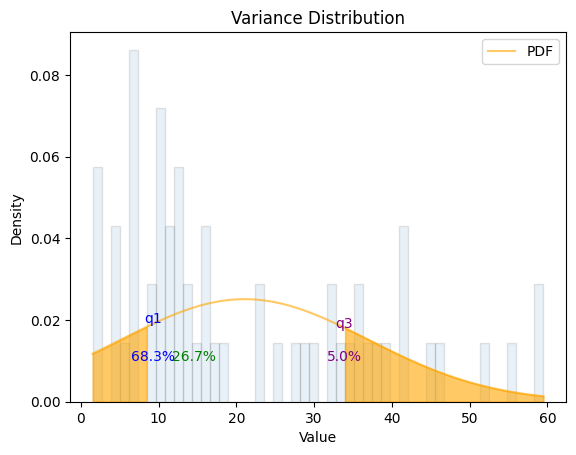

In [ ]:
##https://stackoverflow.com/questions/49630427/how-to-plot-normal-distribution-with-percentage-of-data-as-label-in-each-band-bi
##https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# dummy data
s = np.array([12.5,23.5,28.0,11.0,36.0,2.0,23.5,59.5,38.5,35.5,10.0,10.5,4.0,10.0,7.0,16.5,12.5,14.0,10.0,17.0,41.5,15.5,7.0,37.0,7.0,4.0,8.5,51.5,32.5,59.0,56.0,12.5,15.0,35.0,29.0,32.0,11.0,6.0,41.5,7.0,1.5,33.5,46.5,4.0,11.0,25.0,39.5,10.0,9.5,16.0,44.5,12.5,29.5,41.0,2.0,13.5,2.0,18.0,7.0,7.0])
mu = np.mean(s)
sigma = np.std(s)
n_bins = 50
# histogram
n, bins, patches = plt.hist(s, bins=n_bins, density=True, alpha=0.1, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram')

# probability density function
pdf = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, pdf, color='orange', alpha=0.6, label='PDF')

# to ensure pdf and bins line up to use fill_between.
median, q1, q3 = np.percentile(s, 50), np.percentile(s, 25), np.percentile(s, 75)
bins_1 = bins[(bins >= q1 - 1.5 * (q3 - q1)) & (bins <= q1)]
bins_2 = bins[(bins <= q3 + 1.5 * (q3 - q1)) & (bins >= q3)]
pdf_1 = stats.norm.pdf(bins_1, mu, sigma)
pdf_2 = stats.norm.pdf(bins_2, mu, sigma)

# fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
plt.fill_between(bins_1, pdf_1, 0, alpha=0.6, color='orange')
plt.fill_between(bins_2, pdf_2, 0, alpha=0.6, color='orange')

# Calculate cumulative percentage within 1st, 2nd, and 3rd standard deviations from the mean
within_1std = np.sum(np.abs(s - mu) <= sigma) / len(s) * 100
within_2std = np.sum(np.abs(s - mu) <= 2 * sigma) / len(s) * 100
within_3std = np.sum(np.abs(s - mu) <= 3 * sigma) / len(s) * 100

# add text to the graph
plt.annotate("{:.1f}%".format(within_1std), xy=(q1, 0), xytext=(q1, 0.01), ha='center', fontsize=10, color='blue')
plt.annotate("{:.1f}%".format(within_2std - within_1std), xy=(median, 0), xytext=(median, 0.01), ha='center', fontsize=10, color='green')
plt.annotate("{:.1f}%".format(within_3std - within_2std), xy=(q3, 0), xytext=(q3, 0.01), ha='center', fontsize=10, color='purple')
plt.annotate('q1', xy=(q1, pdf[np.abs(bins - q1).argmin()]), ha='center', fontsize=10, color='blue')
plt.annotate('q3', xy=(q3, pdf[np.abs(bins - q3).argmin()]), ha='center', fontsize=10, color='purple')

plt.title('Variance Distribution')
plt.legend(['PDF'])

plt.show()

In [ ]:
## area after taking the second median of the area of the complete 001 image
data=[12.5,23.5,28.0,11.0,36.0,2.0,23.5,59.5,38.5,35.5,10.0,10.5,4.0,10.0,7.0,16.5,12.5,14.0,10.0,17.0,41.5,15.5,7.0,37.0,7.0,4.0,8.5,51.5,32.5,59.0,56.0,12.5,15.0,35.0,29.0,32.0,11.0,6.0,41.5,7.0,1.5,33.5,46.5,4.0,11.0,25.0,39.5,10.0,9.5,16.0,44.5,12.5,29.5,41.0,2.0,13.5,2.0,18.0,7.0,7.0]
# area after taking the second median of the area of the complete 001 image
data= [3.0, 0.5, 5.5, 2.5, 0.5, 8.5, 13.5, 18.0, 5.5, 38.5, 34.0, 2.0, 2.0, 7.0, 10.0, 11.0, 8.5, 14.0, 13.0, 32.0, 42.0, 8.0, 20.0, 32.0, 4.0, 15.0, 7.0, 8.5, 41.5, 2.0, 15.0, 39.0, 38.5, 25.0, 22.5, 12.0, 4.0, 7.0, 16.5, 8.5, 31.0, 15.0, 31.0, 4.0, 5.5, 40.0, 5.5, 18.5, 27.5, 27.0, 27.5, 5.0, 3.5, 44.5, 27.5, 4.0, 18.0, 4.0, 14.5, 39.5, 17.5, 5.5, 20.0, 2.0, 2.0, 23.0, 8.0, 11.5, 2.0, 13.5, 13.5, 45.0, 20.0, 22.5, 5.5, 11.0, 8.5, 19.5, 17.5, 7.0, 35.5, 15.5, 11.0, 23.5, 7.0, 18.5, 7.0, 41.5, 18.5, 16.0, 8.5, 12.5, 34.5, 27.5, 28.0, 2.0, 8.5, 12.5, 22.5, 23.5, 23.5, 10.0, 25.5, 12.5, 12.5, 13.5, 39.5, 2.0, 24.5, 33.5, 11.5, 39.0, 27.5, 5.5, 5.5, 38.0, 5.5, 10.0, 9.5, 7.0, 15.0, 4.0, 7.0, 2.0, 14.0, 22.0, 11.0, 16.5, 14.0, 5.5, 14.0, 2.0, 19.5, 10.0, 10.0, 21.0, 12.5, 17.0, 5.5, 41.5, 14.5, 15.5, 7.0, 23.5, 38.5, 7.0, 4.0, 4.0, 7.0, 8.5, 11.0, 15.0, 26.5, 20.5, 32.5, 8.5, 2.0, 15.0, 19.5, 11.0, 15.0, 16.0, 23.5, 35.0, 29.0, 28.0, 18.5, 28.5, 11.0, 6.0, 4.0, 41.5, 2.0, 34.0, 7.0, 1.5, 10.0, 7.0, 5.5, 32.0, 12.5, 7.0, 4.0, 33.5, 45.5, 39.0, 4.0, 11.0, 5.5, 2.0, 10.0, 23.5, 26.5, 17.0, 24.0, 38.5, 44.5, 19.0, 7.0, 9.5, 17.5, 42.0, 8.5, 12.5, 31.0, 20.5, 41.0, 2.0, 2.0, 2.0, 16.5, 18.0, 8.0, 40.5, 2.0, 2.0, 34.5, 7.0, 20.0, 7.0, 7.0, 2.0, 2.0, 10.0]
# # sorted 30% of the area
# sorted_data=[ 0.5 , 0.5 , 1.5 , 2. ,  2.,  2. ,  2. ,  2. ,  2. ,  2.,   2. ,  2. ,  2.,   2.,
#   2. ,  2. ,  2. ,  2.   ,2. ,  2. ,  2.  , 2. ,  2.  , 2.5 , 3. ,  3.5 , 4.,   4.,
#   4. ,  4.,   4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  5. ,  5.5 , 5.5,  5.5,  5.5,
#   5.5 , 5.5,  5.5,  5.5,  5.5 , 5.5,  5.5,  5.5,  5.5,  6.,   7.,   7.,   7.,   7.,
#   7. ,  7.  , 7. ,  7.  , 7.  , 7.  , 7.  , 7.  , 7. ,  7.,   7.   ,7.  , 7.,   7.,
#   8. ,  8.,   8. ,  8.5,  8.5,  8.5,  8.5 , 8.5 , 8.5  ,8.5,  8.5 , 8.5,  8.5,  9.5,
#   9.5, 10. , 10.  ,10. , 10.  ,10. , 10.  ,10. , 10. , 11. , 11. , 11.,  11.,  11.,
#  11.,  11.,  11.,  11.5 ,11.5, 12. , 12.5, 12.5 ,12.5, 12.5, 12.5, 12.5, 12.5, 13.,
#  13.5, 13.5, 13.5, 13.5 ,14.,  14.,  14.,  14.,  14.5, 14.5, 15. , 15.,  15. , 15.,
#  15.,  15.,  15.,  15.5, 15.5, 16. , 16.  ,16.5]
# #all the image pores:
# cnt_area_list = [0.0, 3.0, 0.0, 0.0, 0.0, 0.5, 5.5, 2.5, 0.5, 1136182.0, 8.5, 13.5, 18.0, 5.5, 38.5, 34.0, 2.0, 2.0, 199.0, 74.0, 7.0, 10.0, 11.0, 8.5, 14.0, 65.5, 167.0, 13.0, 86.0, 56.5, 208.0, 32.0, 466.5, 230.0, 108.0, 42.0, 232.0, 66.5, 8.0, 20.0, 32.0, 4.0, 1098.5, 74.0, 15.0, 7.0, 8.5, 220.5, 41.5, 2.0, 15.0, 39.0, 199.5, 72.5, 929.0, 38.5, 59.5, 25.0, 22.5, 12.0, 49.5, 4.0, 7.0, 16.5, 645.0, 8.5, 31.0, 15.0, 93.0, 90.0, 88.0, 31.0, 305.0, 218.5, 113.0, 189.5, 369.5, 722.5, 4.0, 74.0, 65.5, 5.5, 40.0, 5.5, 195.5, 18.5, 27.5, 138.5, 27.0, 27.5, 229.5, 241.0, 100.5, 647.0, 5.0, 3.5, 403.5, 69.5, 152.0, 44.5, 1965.0, 273.5, 27.5, 4.0, 18.0, 4.0, 14.5, 324.5, 39.5, 17.5, 5.5, 20.0, 68.5, 226.0, 340.0, 727.5, 2.0, 2.0, 23.0, 254.5, 101.0, 93.0, 80.0, 8.0, 79.0, 422.0, 11.5, 97.5, 2.0, 1501.5, 13.5, 13.5, 45.0, 795.5, 114.5, 20.0, 22.5, 5.5, 60.5, 11.0, 156.0, 8.5, 285.5, 80.0, 1241.0, 0.0, 19.5, 17.5, 657.0, 7.0, 35.5, 48.0, 15.5, 267.5, 11.0, 271.0, 101.0, 204.5, 52.5, 23.5, 81.0, 192.0, 114.5, 7.0, 153.0, 57.0, 18.5, 80.0, 7.0, 369.5, 113.0, 41.5, 18.5, 70.0, 16.0, 8.5, 258.5, 892.5, 79.0, 67.0, 12.5, 85.5, 34.5, 256.0, 70.0, 27.5, 316.0, 0.0, 28.0, 2.0, 8.5, 12.5, 22.5, 23.5, 223.0, 78.0, 460.0, 23.5, 10.0, 79.0, 78.5, 416.5, 91.0, 25.5, 12.5, 12.5, 140.0, 13.5, 228.0, 39.5, 46.0, 2.0, 24.5, 33.5, 54.5, 11.5, 57.5, 190.0, 201.0, 39.0, 27.5, 5.5, 79.0, 151.5, 5.5, 38.0, 5.5, 10.0, 262.0, 108.5, 3885.5, 648.0, 9.5, 7.0, 190.0, 15.0, 4.0, 7.0, 2.0, 14.0, 22.0, 2294.0, 108.0, 11.0, 97.5, 16.5, 14.0, 5.5, 14.0, 74.5, 111.5, 2.0, 165.5, 288.5, 19.5, 466.5, 57.0, 481.0, 10.0, 10.0, 71.0, 198.0, 21.0, 175.5, 72.0, 12.5, 17.0, 89.0, 789.0, 288.0, 496.5, 5.5, 41.5, 14.5, 393.5, 76.0, 81.5, 247.0, 15.5, 1103.5, 138.0, 7.0, 47.0, 23.5, 38.5, 224.0, 196.5, 7.0, 4.0, 4.0, 7.0, 8.5, 55.0, 86.5, 392.5, 11.0, 117.0, 271.0, 15.0, 1170.0, 26.5, 102.5, 341.0, 51.5, 600.5, 0.0, 20.5, 91.0, 888.0, 72.5, 32.5, 8.5, 76.0, 61.5, 349.0, 102.5, 199.5, 3631.5, 80.0, 56.0, 2.0, 15.0, 1258.5, 84.5, 19.5, 11.0, 137.0, 329.0, 71.0, 15.0, 354.0, 2069.0, 16.0, 23.5, 35.0, 646.5, 52.5, 2746.5, 29.0, 0.0, 28.0, 894.5, 459.5, 263.5, 81.5, 18.5, 28.5, 70.0, 115.0, 169.5, 11.0, 55.0, 6.0, 70.5, 4.0, 191.0, 41.5, 2.0, 91.5, 34.0, 7.0, 2207.0, 1.5, 0.0, 10.0, 76.5, 504.5, 524.5, 164.5, 7.0, 75.0, 5.5, 32.0, 59.0, 12.5, 66.0, 329.5, 7.0, 79.0, 4.0, 33.5, 129.5, 45.5, 39.0, 4.0, 408.5, 11.0, 128.0, 678.0, 65.5, 63.5, 102.0, 5.5, 91.0, 344.5, 2.0, 10.0, 669.0, 1115.0, 1915.5, 423.0, 23.5, 632.0, 26.5, 108.5, 150.5, 17.0, 618.0, 24.0, 867.0, 38.5, 44.5, 1724.0, 251.5, 77.0, 19.0, 7.0, 64.0, 9.5, 17.5, 42.0, 167.5, 200.0, 8.5, 12.5, 31.0, 65.0, 20.5, 328.5, 1339.0, 41.0, 71.5, 816.5, 2.0, 2.0, 2.0, 16.5, 18.0, 8.0, 40.5, 2.0, 2.0, 34.5, 7.0, 380.5, 20.0, 142.0, 7.0, 7.0, 135.5, 2.0, 300.5, 2.0, 215.5, 85.0, 83.0, 61.0, 178.0, 10.0]
# print('max cnt_area_list', np.max(cnt_area_list))
# print('cnt_area_list mean area', np.mean(cnt_area_list))

# The new pipe line with more pore types:

orginal image
img.shape (642, 503, 3)


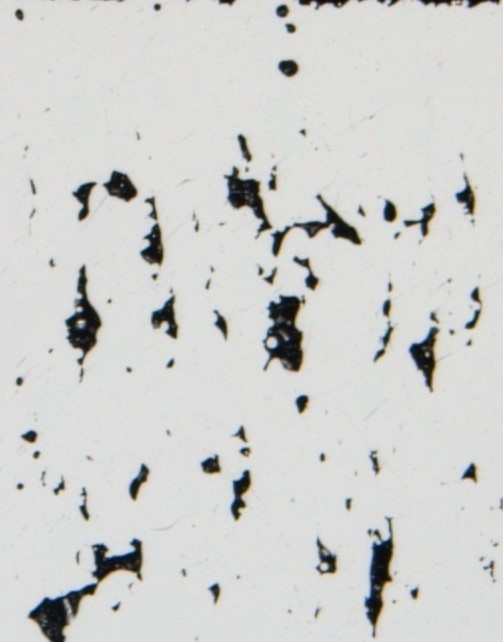

gray image
gray image.shape (642, 503)


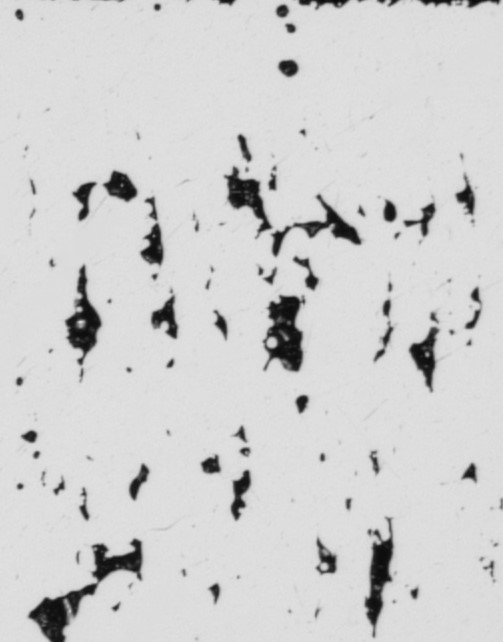

In [1]:
## load the training image
from skimage.io import imread, imshow
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import time
from google.colab.patches import cv2_imshow

img_org = cv2.imread('/content/new_cropped_001.jpg')
##crop_img = img[y:y+h, x:x+w]  ## img.shape (1080, 1920, 3)
# img_org = img_org[:, 300:1600]  ## croped image used with only our data images
# img_org = img_org[:, 430:1490]  ## croped image used with only our data images   img.shape (1080, 1060, 3)
# img_org = img_org[45:1035,:]  ## croped image used with only our data images  img.shape (990, 1060, 3)
print('orginal image')
print('img.shape',img_org.shape)
cv2_imshow(img_org)

img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
print('gray image')
print('gray image.shape',img.shape)
cv2_imshow(img)

# plt.imshow(img)
# plt.axis('off')
# plt.show()

# Extract pixel features

In [2]:
#Here, if we have multichannel image then extract the right channel instead of converting the image to grey.
#For example, if DAPI contains nuclei information, extract the DAPI channel image first.
#Multiple images can be used for training. For that, we need to concatenate the data
#Save original image pixels into a data frame. This is our Feature #1.

img2 = img.reshape(-1) ## reshape the image into single column
print('img converted to one column',img2.shape)
df = pd.DataFrame()
t0 = time.time()   ## starting time

df['Original Image'] = img2

# #Generate Gabor features
# num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
# kernels = []
# for theta in range(2):   #Define number of thetas
#     theta = theta / 4. * np.pi
#     for sigma in (1, 3):  #Sigma with 1 and 3
#         for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
#             for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


#                 gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
# #                print(gabor_label)
#                 ksize=3  # we can use 9 if the image big size
#                 kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
#                 kernels.append(kernel)
#                 #Now filter the image and add values to a new column
#                 fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
#                 filtered_img = fimg.reshape(-1)
#                 df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
#                 print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
#                 num += 1  #Increment for gabor column label

########################################
#Gerate OTHER FEATURES out of pixels and add them to the data frame

#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

Kernal_size = 3

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=Kernal_size)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=Kernal_size)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe

feat_ext_time = time.time()-t0
local_time_feature_rxtraction = time.localtime(feat_ext_time)

img converted to one column (322926,)


input image (642, 503)
gray image (322926,)


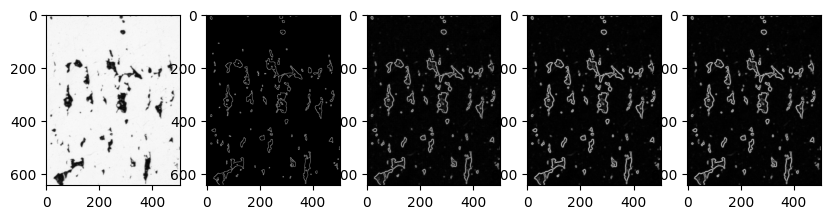

In [3]:
# show some pf the feature images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(10,10))
print('input image',img.shape)
print('gray image',img2.shape)

axes[0].imshow(np.asanyarray(df['Original Image']).reshape(img.shape), cmap=plt.cm.gray)
axes[1].imshow(np.asanyarray(df['Canny Edge']).reshape(img.shape), cmap=plt.cm.gray)
axes[2].imshow(np.asanyarray(df['Roberts']).reshape(img.shape), cmap=plt.cm.gray)
axes[3].imshow(np.asanyarray(df['Sobel']).reshape(img.shape), cmap=plt.cm.gray)
axes[4].imshow(np.asanyarray(df['Scharr']).reshape(img.shape), cmap=plt.cm.gray)

input image (642, 503)
gray image (322926,)


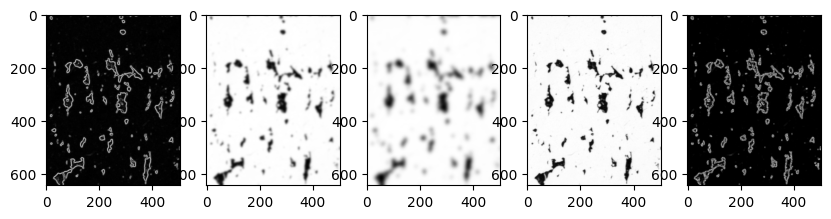

In [4]:
# show some pf the feature images
import matplotlib.pyplot as plt2
fig, axes = plt2.subplots(1, 5, figsize=(10,10))
print('input image',img.shape)
print('gray image',img2.shape)

axes[0].imshow(np.asanyarray(df['Prewitt']).reshape(img.shape), cmap=plt.cm.gray)
axes[1].imshow(np.asanyarray(df['Gaussian s3']).reshape(img.shape), cmap=plt.cm.gray)
axes[2].imshow(np.asanyarray(df['Gaussian s7']).reshape(img.shape), cmap=plt.cm.gray)
axes[3].imshow(np.asanyarray(df['Median s3']).reshape(img.shape), cmap=plt.cm.gray)
axes[4].imshow(np.asanyarray(df['Variance s3']).reshape(img.shape), cmap=plt.cm.gray)

# output (pore shapes) labels and create a mask

# try to use the parent pores

the binary image
binary shape (642, 503)


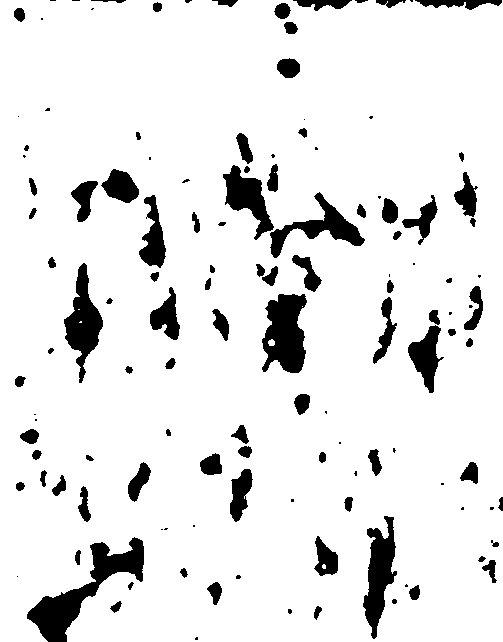

len main contours 126
cnt_area_list [316747.0, 12.5, 23.5, 80.0, 90.0, 28.0, 138.0, 11.0, 229.0, 36.0, 2.0, 23.5, 59.5, 188.0, 38.5, 80.5, 35.5, 10.0, 647.0, 10.5, 4.0, 10.0, 7.0, 2291.5, 16.5, 12.5, 14.0, 111.5, 292.0, 10.0, 73.5, 177.5, 17.0, 89.0, 797.0, 288.0, 499.5, 41.5, 393.5, 76.0, 82.5, 249.0, 15.5, 139.0, 7.0, 37.0, 222.0, 196.5, 7.0, 4.0, 8.5, 271.5, 102.5, 51.5, 92.5, 32.5, 59.0, 56.0, 1260.5, 12.5, 135.5, 332.5, 15.0, 35.0, 643.5, 2751.5, 29.0, 0.0, 894.5, 459.0, 82.5, 32.0, 69.0, 11.0, 6.0, 72.0, 188.0, 41.5, 92.5, 7.0, 2212.0, 1.5, 0.0, 75.5, 500.5, 63.5, 33.5, 46.5, 4.0, 125.5, 62.0, 101.0, 344.5, 11.0, 669.0, 1116.5, 1908.5, 629.5, 25.0, 106.0, 617.0, 866.0, 39.5, 1727.0, 252.5, 0.0, 10.0, 9.5, 16.0, 44.5, 12.5, 29.5, 328.5, 41.0, 69.5, 2.0, 13.5, 2.0, 18.0, 384.0, 148.0, 7.0, 7.0, 135.0, 218.5, 86.0]
length sorted_area_list_1 122
sorted_area_list_1 36
twenty_persent_of_area_list [ 1.5  2.   2.   2.   4.   4.   4.   6.   7.   7.   7.   7.   7.   7.
  8.5  9.5 10.  10. 

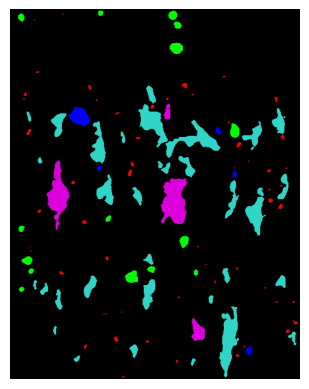

In [5]:
# Threshold the image to obtain binary image
## https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html

ret, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)   ## check from here
# Find contours in the binary image
print('the binary image')
print('binary shape', binary.shape)
cv2_imshow(binary)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print("hierarchy", hierarchy)

print('len main contours', len(contours))
max_cnt = max(contours, key = cv2.contourArea)

# ######################### new code
max_area = cv2.contourArea(max_cnt)
cnt_area_list = []
convexity_all_pores=[]
for f, contour in enumerate(contours):
    cnt_rect = cv2.minAreaRect(contour)
    cnt_area = cv2.contourArea(contour)
    cnt_area_list.append(cnt_area)
# ############### new to calculate convexity
#     if cnt_area != 0 and cnt_area != max_area:
#       hull_a = cv2.convexHull(contour)
#       # Calculate the convexity of the contour
#       hull_area = cv2.contourArea(hull_a)
#       convexity = hull_area / cnt_area
#       solidity = float(cnt_area)/hull_area
#       convexity_all_pores.append(convexity)

# print('convexity calculation')
# convexity_mean = np.mean(convexity_all_pores)
# convexity_std = np.std(convexity_all_pores)
# convexity_mean_minus_sd = convexity_mean - 3*convexity_std
# convexity_mean_plus_sd = convexity_mean + 3*convexity_std
# print('max_convexity',np.max(convexity_all_pores))
# print('min_convexity',np.min(convexity_all_pores))
# print('median_convexity',np.median(convexity_all_pores))
# print('mean_convexity',convexity_mean)
# print('std_convexity',convexity_std)
# print('convexity_mean_minus_sd',convexity_mean_minus_sd)
# print('convexity_mean_plus_sd',convexity_mean_plus_sd)
# ############### new
print('cnt_area_list',cnt_area_list)
area_list = [item for item in cnt_area_list if item < max_area]
area_list_1 = [item for item in area_list if item > 0]
median_area = np.median(area_list_1)

sorted_area_list_1 = np.sort(area_list_1)
#print('sorted_area_list_1',sorted_area_list_1)
print('length sorted_area_list_1',len(sorted_area_list_1))
twenty_persent_list=int((len(sorted_area_list_1))*0.3)
print('sorted_area_list_1',twenty_persent_list)
twenty_persent_of_area_list = sorted_area_list_1[:twenty_persent_list]
print('twenty_persent_of_area_list',twenty_persent_of_area_list)

sorted_list_median_area_2 = np.median(twenty_persent_of_area_list)
sorted_list_mean_area_2 = np.mean(twenty_persent_of_area_list)
sorted_list_std_area_2 = np.std(twenty_persent_of_area_list)
sorted_list_mean_minus_sd = sorted_list_mean_area_2 - 3*sorted_list_std_area_2
sorted_list_mean_plus_sd = sorted_list_mean_area_2 + 3*sorted_list_std_area_2
print('sorted_list_max_area_2',np.max(twenty_persent_of_area_list))
print('sorted_list_min_area_2',np.min(twenty_persent_of_area_list))
print('sorted_list_median_area_2',sorted_list_median_area_2)
print('sorted_list_mean_area_2',sorted_list_mean_area_2)
print('sorted_list_std_area_2',sorted_list_std_area_2)
print('sorted_list_mean_minus_sd',sorted_list_mean_minus_sd)
print('sorted_list_mean_plus_sd',sorted_list_mean_plus_sd)
print('count_process_pores sorted list',len(twenty_persent_of_area_list))

area_list_2 = [item for item in area_list_1 if item < median_area]
print('area after take the second median', area_list_2)
median_area_2 = np.median(area_list_2)
mean_area_2 = np.mean(area_list_2)
std_area_2 = np.std(area_list_2)
mean_minus_sd = mean_area_2 - 3*std_area_2
area_mean_plus_sd = mean_area_2 + 3*std_area_2
print('max_area_2',np.max(area_list_2))
print('min_area_2',np.min(area_list_2))
print('median_area_2',median_area_2)
print('mean_area_2',mean_area_2)
print('std_area_2',std_area_2)
print('mean_minus_sd',mean_minus_sd)
print('area_mean_plus_sd',area_mean_plus_sd)
print('count_process_pores',len(area_list_2))
######################### new code
# Create an empty binary mask for each contour
masks = [np.zeros(binary.shape, dtype=np.uint8) for _ in contours]
count_no_child = []
count_with_child = []
# Loop through each contour
covexity_process_pore=[]  #new
covexity_gas_pore=[]  #new
covexity_crack_pore=[]  #new
covexity_LOF_pore=[]  #new
covexity_unmelted_pore=[]  #new

solidity_process_pore=[]  #new
solidity_gas_pore=[]  #new
solidity_crack_pore=[]  #new
solidity_LOF_pore=[]  #new
solidity_unmelted_pore=[]  #new

for i, cnt in enumerate(contours):
    rect = cv2.minAreaRect(cnt)
    area = cv2.contourArea(cnt)
    ## hierarchy[0][i][j] means iterating through ith row (contour) and j in [0,1,2,3] = [Next, Previous, Child, Parent]
    if area != max_area and area > 2: # if the current contour area is not equal to workpiece area
      #print('len main contours without max and min area', len(contours))
      if hierarchy[0][i][2] == -1 and hierarchy[0][i][3] == 0: # Check if the contour has no child and the parent is the maximum contour=0
        count_no_child.append(1)
        (cx, cy), (w, h), angle = rect # No conversion required in the aspect ratio the unit divided
        aspect_ratio = max(w, h) / min(w, h)
        #print("aspect ratio", aspect_ratio)
        perimeter = cv2.arcLength(cnt, True)
        pore_circularities = 4 * np.pi * (area / (perimeter * perimeter))
        #print("pore_circularities", pore_circularities)
        ############### new
        hull_a = cv2.convexHull(cnt)
        # Calculate the convexity of the contour
        hull_area = cv2.contourArea(hull_a)
        convexity = hull_area / area
        solidity = float(area)/hull_area

        convexity_all_pores.append(convexity)
        ############### new
        # Get the type of the contour
        # print("i = ", i)
        if area > 0 and area < area_mean_plus_sd: # check by ploting which is having high %: 1sigma %, 2sgma %, 3sigma %
          covexity_process_pore.append(convexity) # new
          solidity_process_pore.append(solidity) # new
          annotation = 1 # process pore red color
          # print("Red i = ", i)
        elif pore_circularities >=  0.80 and area > area_mean_plus_sd:
          annotation = 2 ## Gas pore (circle) green color
          covexity_gas_pore.append(convexity) # new
          solidity_gas_pore.append(solidity) # new
        #elif aspect_ratio >= 3.5 and pore_circularities < 0.35:
        #elif aspect_ratio >= 3.5 and pore_circularities < 0.35:
        elif aspect_ratio >= 3.5 and pore_circularities < 0.35 and convexity < 0.35:
          annotation = 3 ## (1) crack pore (line) yellow color
          covexity_crack_pore.append(convexity) # new
          solidity_crack_pore.append(solidity) # new
        else:
          if convexity > 0.99 and convexity < 1.06: ## put convexity_mean_plus_minus_3sd ====> over all pores convexity_mean_minus_sd 0.6682855568605028   convexity_mean_plus_sd 1.5053275960445822
            annotation = 4  # blue color  (keyhole pores)
          else:
            annotation = 5   ## Turquoise color  (LOF pores)
          covexity_LOF_pore.append(convexity) # new
          solidity_LOF_pore.append(solidity) # new
      else: # Check if the contour is a pore (with child contours)
          # print("Pink i = ", i))
          count_with_child.append(1)
          annotation = 6   # (220, 0, 220) pink un-melted pore
          # covexity_unmelted_pore.append(convexity) # new
          # solidity_unmelted_pore.append(solidity) # new

      # Fill the mask with the annotation value
      cv2.drawContours(masks[i], [cnt], 0, annotation, -1)
      cv2.drawContours(masks[i], [cnt], 0, 0, 1)  # Add class 0 label (black border),  last parameter is the thickness of the contour crack (line) to be drawn
print('all pores convexity',convexity_all_pores)
################## new
# pore_type = covexity_unmelted_pore  ## do not forget to change this variable to the pore type you want
print('************ covexity statistics for each pore type *********************')

# print('max_covexity =',round(np.max(pore_type),3))
# print('min_covexity =',round(np.min(pore_type),3))
# print('median_covexity =',round(np.median(pore_type),3))
# print('mean_covexity =',round(np.mean(pore_type),3))
# print('std_covexity =',round(np.std(pore_type),3))
# print('count_pores =',len(pore_type))
# convexity_mean_minus_sd = (np.mean(pore_type)) - 3*np.std(pore_type)
# convexity_mean_plus_sd = (np.mean(pore_type)) + 3*np.std(pore_type)
# print('convexity_mean_minus_sd =',round(convexity_mean_minus_sd,3))
# print('convexity_mean_plus_sd =',round(convexity_mean_plus_sd,3))
print('************ covexity statistics for each pore type *********************')

print('************ solidity statistics for each pore type *********************')
# pore_type = solidity_unmelted_pore  ## do not forget to change this variable to the pore type you want
# print('max_solidity =',round(np.max(pore_type),3))
# print('min_solidity =',round(np.min(pore_type),3))
# print('median_solidity =',round(np.median(pore_type),3))
# print('mean_solidity =',round(np.mean(pore_type),3))
# print('std_solidity =',round(np.std(pore_type),3))
# print('count_pores =',len(pore_type))
# solidity_mean_minus_sd = (np.mean(pore_type)) - 3*np.std(pore_type)
# solidity_mean_plus_sd = (np.mean(pore_type)) + 3*np.std(pore_type)
# print('solidity_mean_minus_sd =',round(solidity_mean_minus_sd,3))
# print('solidity_mean_plus_sd =',round(solidity_mean_plus_sd,3))
print('************ solidity statistics for each pore type *********************')
################## new
print('count the contour without child', len(count_no_child))
print('count the contour with child', len(count_with_child))
# Combine all masks to create the final annotation image
annotation = np.zeros(binary.shape, dtype=np.uint8)
for mask in masks:
  annotation[mask > 0] = mask[mask > 0]

# Color the pixels belonging to each contour  RGB=red,green,blue
colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255), 5: (48, 213, 200), 6: (220, 0, 220)}
annotated_img = np.zeros_like(img_org)

for annotation_value, color in colors.items():
  pixels_of_certain_type = np.argwhere(annotation == annotation_value)
  for x,y in pixels_of_certain_type:
    annotated_img[x, y] = np.array(color)

# Show the final annotated image
print('the annotated image')
print('annotated_img shape', annotated_img.shape)
#cv2_imshow(annotated_img)
plt.imsave('/content/labeled_train_img.jpg', annotated_img)


plt.imshow(annotated_img)
plt.axis('off')
plt.show()

# Add the labels variable then save the features and labels into csv file

In [6]:
labeled_img1 = annotation.reshape(-1) ### here is the change
print('labeled_img1 shape', labeled_img1.shape)
print('annotation shape', annotation.shape)

df['Labels'] = labeled_img1
#####################################
print('the unique labels', df['Labels'].unique())
print('the count of the unique labels', df['Labels'].value_counts())

#print("labeled_img1", labeled_img1[88600:88829])
#df.to_csv("before_removing_pixels_pixels_features_and_lables.csv")
#df = df[df['Labels'] != 0] ## to remove the pixels of the background which not represensetive to our objects
###print(df.head())
df.to_csv("pixels_features_and_lables.csv")

labeled_img1 shape (322926,)
annotation shape (642, 503)
the unique labels [0 2 1 5 6 4]
the count of the unique labels 0    296780
5     15896
6      5533
2      2466
4      1149
1      1102
Name: Labels, dtype: int64


In [23]:
#############################################################################
# Handling Imbalanced data
###########################################
def balanced_classes():
  print('Technique of Up-sample minority class and Down-sample the majority class')
  print('using the same number of the pixels in Ellipse class==3 for all other classes')
  from sklearn.utils import resample
  print('Label counts of all the classes in the test image', df['Labels'].value_counts())
  count_all_classes = df['Labels'].value_counts()
  #ellipse_class_count = count_all_classes[3]
  #background_class_count = int((count_all_classes[0]) / 2)  # if i want  to match average class count of samples
  # count_df_LOF=df[df['Labels'] == 4].value_counts()


  #Separate majority and minority classes
  df_background = df.loc[df['Labels'].isin([0])]
  df_processed = df[df['Labels'] == 1]  # processed pore (red)
  df_Gas = df[df['Labels'] == 2] # Gas pore (green)
  #df_crack = df[df['Labels'] == 3] # crack pore (yellow)
  df_keyhole = df[df['Labels'] == 4] # keyhole pore (blue)
  df_LOF = df[df['Labels'] == 5] # LOF pore (Turquoise)
  df_un_melted = df[df['Labels'] == 6] # UN-melted pore (pink)

  # Upsample minority class and other classes separately
  # If not, random samples from combined classes will be duplicated and we run into
  #same issue as before, undersampled remians undersampled.
  # df_background_resampled = resample(df_background,
  #                                 replace=True,     # sample with replacement
  #                                 n_samples=60000,
  #                                 random_state=42) # reproducible results
  # df_processed_resampled = resample(df_processed,
  #                                 replace=True,
  #                                 n_samples=60000,
  #                                 random_state=42)
  df_Gas_resampled = resample(df_Gas,
                                  replace=True,
                                  n_samples=15000,
                                  random_state=42)
  # df_crack_resampled = resample(df_crack,
  #                                 replace=True,
  #                                 n_samples=60000,
  #                                 random_state=42)
  # df_keyhole_resampled = resample(df_keyhole,
  #                                 replace=True,
  #                                 n_samples=60000,
  #                                 random_state=42)
  # df_LOF_resampled = resample(df_LOF,
  #                                 replace=True,
  #                                 n_samples=60000,
  #                                 random_state=42)
  df_un_melted_resampled = resample(df_un_melted,
                                  replace=True,
                                  n_samples=15896,
                                  random_state=42)

  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_background, df_processed, df_Gas_resampled, df_keyhole, df_LOF, df_un_melted_resampled])
#  df_upsampled = pd.concat([df_background_resampled, df_processed_resampled, df_Gas_resampled, df_crack_resampled, df_keyhole_resampled, df_LOF_resampled, df_un_melted_resampled])
  print('The classes after up/down sampling:')
  print(df_upsampled['Labels'].value_counts())

  #Define the target
  Y_upsampled = df_upsampled["Labels"].values
  #Define the independent variables
  X_upsampled = df_upsampled.drop(labels = ["Labels"], axis=1)

  return X_upsampled, Y_upsampled

# Define the dependent variable that needs to be predicted (labels) and split into train and test

In [24]:
y = df["Labels"].values
#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1)

In [25]:
# to train with the balanced classes

X, y = balanced_classes()

Technique of Up-sample minority class and Down-sample the majority class
using the same number of the pixels in Ellipse class==3 for all other classes
Label counts of all the classes in the test image 0    296780
5     15955
6      5533
2      2466
1      1102
4      1090
Name: Labels, dtype: int64
The classes after up/down sampling:
0    296780
5     15955
6     15896
2     15000
1      1102
4      1090
Name: Labels, dtype: int64


# import the classifiers

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils import class_weight


##https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# names = ["Nearest Neighbors", "Linear SVM","RBF SVM","Decision Tree","Random Forest","Neural Net","AdaBoost","Naive Bayes", "QDA"]
# ##,"Gaussian Process"
# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
#     SVC(gamma=2, C=1, max_iter=100, random_state=42),
#     #GaussianProcessClassifier(1.0 * RBF(1.0),random_state = 42),
#     DecisionTreeClassifier(max_depth=5, random_state = 42),
#     RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, random_state = 42),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]
## , random_state=42

# names = ["Linear_SVM","RBF_SVM","Decision_Tree","Random_Forest","Neural_Net","Naive_Bayes"]
# ##,"Gaussian Process"
# classifiers = [
#     SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
#     SVC(gamma=2, C=1, max_iter=100, random_state=42),
#     DecisionTreeClassifier(max_depth=5, random_state = 42),
#     RandomForestClassifier(max_depth=10, n_estimators=200, max_features=5, random_state = 42),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
#     GaussianNB(),
# ]


# # Calculate class weights automatically
# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
# print('class_weights',class_weights)

names = ["Random Forest"]
# ##,"Gaussian Process"
# classifiers = [
#     RandomForestClassifier(max_depth=10, class_weight=dict(enumerate(class_weights)), n_estimators=200, max_features=5, random_state = 42)
# ]

# # with class weight balanced
# classifiers = [
#     RandomForestClassifier(max_depth=10, n_estimators=200, max_features=5, random_state = 42, class_weight='balanced')
# ]

classifiers = [
    RandomForestClassifier(max_depth=10, n_estimators=200, max_features=5, random_state = 42)
]

# Train model with all the image data

name Random Forest
prediction_train results [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 2 5 5 5
 5 2 2 0 0 0 0 0 0 5 5 5 2 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0]
X_train.shape (345823, 10)
prediction_train.shape (345823,)
img.shape (642, 503)
type of prediction_train <class 'numpy.ndarray'>
Random Forest  CLF: Feature extraction time = H:M:S 0 : 0 : 8
Random Forest  CLF: Train time = H:M:S 0 : 1 : 24
Random Forest  CLF: Total time = H:M:S 0 : 1 : 33
Accuracy on training data =  94.317 %
Confusion Matrix [[292425     18    865      0   1145   2327]
 [     0    802     67      0    233      0]
 [     0   

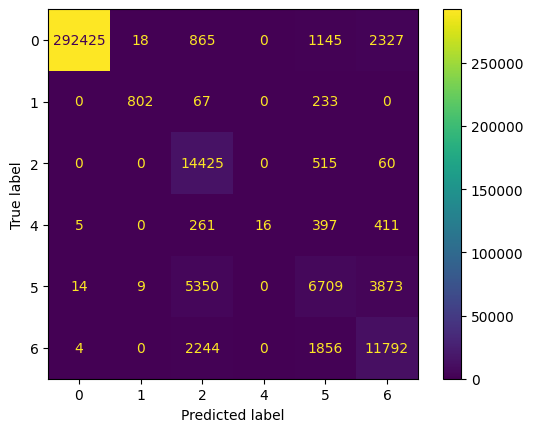

Label  0  accuracy =  0.9853258305815755
Label  1  accuracy =  0.7277676950998185
Label  2  accuracy =  0.9616666666666667
Label  4  accuracy =  0.014678899082568808
Label  5  accuracy =  0.42049514258853027
Label  6  accuracy =  0.7418218419728233
img.shape for segmented (642, 503)
img_org.shape for predicted image (642, 503, 3)


ValueError: ignored

In [27]:
start_train_time = time.time()
for name, model in zip(names, classifiers):
  print('name', name)
  # Train the model on training data
  model.fit(X, y)

  train_time = time.time()-start_train_time
  local_train_time = time.localtime(train_time)

  # verify number of trees used. If not defined above.
  #print('Number of Trees used : ', model.n_estimators)

  #STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA AND CALCULATE THE ACCURACY SCORE
  #First test prediction on the training data itself. SHould be good.
  prediction_train = model.predict(X)
  print("prediction_train results", prediction_train[:250])
  print('X_train.shape',X.shape)
  print('prediction_train.shape',prediction_train.shape)
  print('img.shape',img.shape)
  print('type of prediction_train', type(prediction_train))

  print(name, ' CLF: Feature extraction time = H:M:S', local_time_feature_rxtraction.tm_hour,':',local_time_feature_rxtraction.tm_min,':',local_time_feature_rxtraction.tm_sec)
  print(name, ' CLF: Train time = H:M:S', local_train_time.tm_hour,':',local_train_time.tm_min,':',local_train_time.tm_sec)

  total_time = feat_ext_time+train_time
  total_time = time.localtime(total_time)
  print(name, ' CLF: Total time = H:M:S', total_time.tm_hour,':',total_time.tm_min,':',total_time.tm_sec)

  #prediction_prob_test = model.predict_proba(X_test)

  #Let us check the accuracy on test data
  from sklearn import metrics

  #First check the accuracy on training data. This will be higher than test data prediction accuracy.
  train_acc = metrics.accuracy_score(y, prediction_train)*100
  print ("Accuracy on training data = ", round(train_acc,3), '%')

  #This part commented out for SVM testing. Uncomment for random forest.
  #One amazing feature of Random forest is that it provides us info on feature importances
  #Get numerical feature importances importances = list(model.feature_importances_)

  # feature_list = list(X.columns)
  # feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
  # print('The scors or important features',feature_imp)
  # feature_imp.to_csv("important_features.csv")
  #####################################
    #Confusion Matrix
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  from sklearn import metrics
  confusion_matrix = metrics.confusion_matrix(y, prediction_train)
  print('Confusion Matrix',confusion_matrix)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
  cm_display.plot()
  plt.show()

  #Print individual accuracy values for each class, based on the confusion matrix
  ind_class_acc = confusion_matrix.diagonal()/confusion_matrix.sum(axis=1)
  for i in range(len(model.classes_)):
    print("Label ", model.classes_[i], " accuracy = ", ind_class_acc[i])
  #####################
  import pickle
  #Save the trained model as pickle string to disk for future use
  filename = "/content/CLF_res/{}_trained".format(name)
  pickle.dump(model, open(filename, 'wb'))

  print('img.shape for segmented',img.shape)
  print('img_org.shape for predicted image',img_org.shape)

  # # Color the pixels belonging to each contour
  colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255), 5: (48, 213, 200), 6: (220, 0, 220)}

  segmented = prediction_train.reshape((img.shape))

  predicted_img_train = np.zeros_like(img_org)

  for annotation_value, color in colors.items():
    print('annotation_value',annotation_value)
    pixels_of_certain_type = np.argwhere(segmented == annotation_value)
    #print('pixels_of_certain_type',pixels_of_certain_type)
    for x,y in pixels_of_certain_type:
      predicted_img_train[x, y] = np.array(color)

  plt.imshow(predicted_img_train)
  plt.axis('off')
  #cv2_imshow(predicted_img)
  print('predicted_img shape', predicted_img_train.shape)
  plt.imsave('/content/predicted_images/predicted_train_image_{}.jpg'.format(model), predicted_img_train)


# plot the RF rees

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# Select the index of the tree you want to plot (e.g., 3rd tree)
tree_index = 0

# Plot the selected tree
plt.figure(figsize=(22, 15), dpi=300)
tree.plot_tree(model.estimators_[tree_index], filled=True, rounded=True, class_names=['0','1','2','3'])
plt.title(f'Tree {tree_index+1}')
plt.xlabel('Features')
plt.ylabel('Classes')

# Save the plot to an image file
plt.savefig('/content/predicted_images/RF_tree_image.png')
plt.show()

# **Predict using new images with the saved models**

orginal image
img.shape (642, 503, 3)


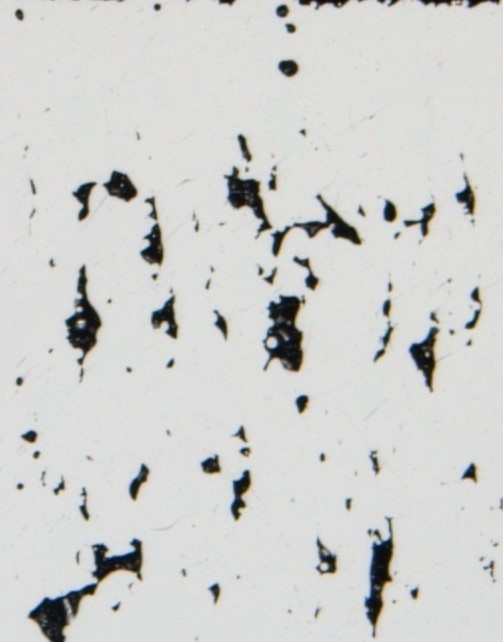

gray image
gray image.shape (642, 503)


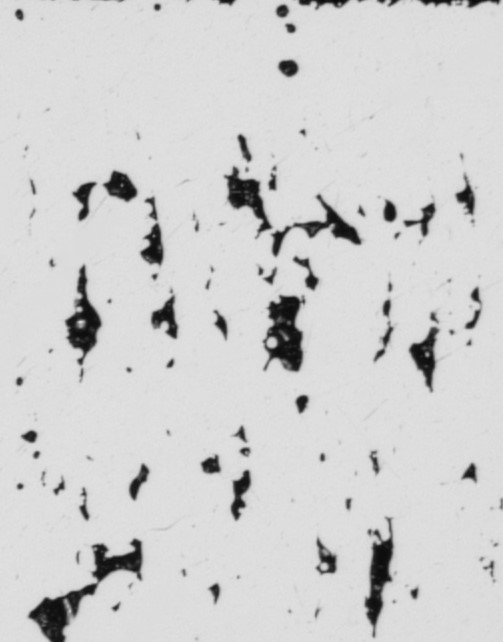

img2.shape (322926,)
img.shape (642, 503)
img2.shape (322926,)
the binary image
binary shape (642, 503)


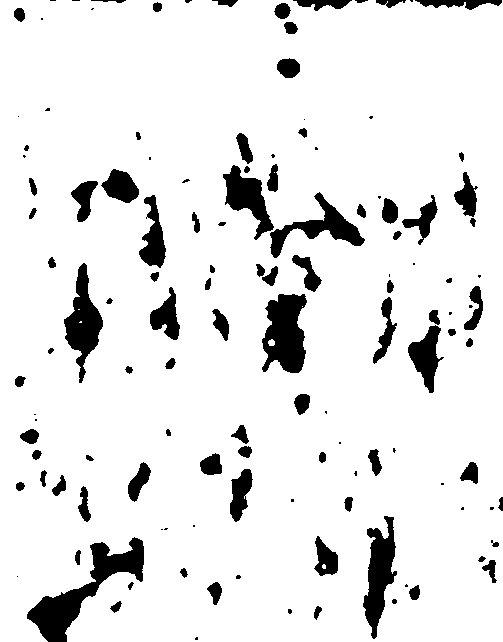

len main contours 126
cnt_area_list [316747.0, 12.5, 23.5, 80.0, 90.0, 28.0, 138.0, 11.0, 229.0, 36.0, 2.0, 23.5, 59.5, 188.0, 38.5, 80.5, 35.5, 10.0, 647.0, 10.5, 4.0, 10.0, 7.0, 2291.5, 16.5, 12.5, 14.0, 111.5, 292.0, 10.0, 73.5, 177.5, 17.0, 89.0, 797.0, 288.0, 499.5, 41.5, 393.5, 76.0, 82.5, 249.0, 15.5, 139.0, 7.0, 37.0, 222.0, 196.5, 7.0, 4.0, 8.5, 271.5, 102.5, 51.5, 92.5, 32.5, 59.0, 56.0, 1260.5, 12.5, 135.5, 332.5, 15.0, 35.0, 643.5, 2751.5, 29.0, 0.0, 894.5, 459.0, 82.5, 32.0, 69.0, 11.0, 6.0, 72.0, 188.0, 41.5, 92.5, 7.0, 2212.0, 1.5, 0.0, 75.5, 500.5, 63.5, 33.5, 46.5, 4.0, 125.5, 62.0, 101.0, 344.5, 11.0, 669.0, 1116.5, 1908.5, 629.5, 25.0, 106.0, 617.0, 866.0, 39.5, 1727.0, 252.5, 0.0, 10.0, 9.5, 16.0, 44.5, 12.5, 29.5, 328.5, 41.0, 69.5, 2.0, 13.5, 2.0, 18.0, 384.0, 148.0, 7.0, 7.0, 135.0, 218.5, 86.0]
area after take the second median [12.5, 23.5, 28.0, 11.0, 36.0, 2.0, 23.5, 59.5, 38.5, 35.5, 10.0, 10.5, 4.0, 10.0, 7.0, 16.5, 12.5, 14.0, 10.0, 17.0, 41.5, 15.5, 7.0, 3

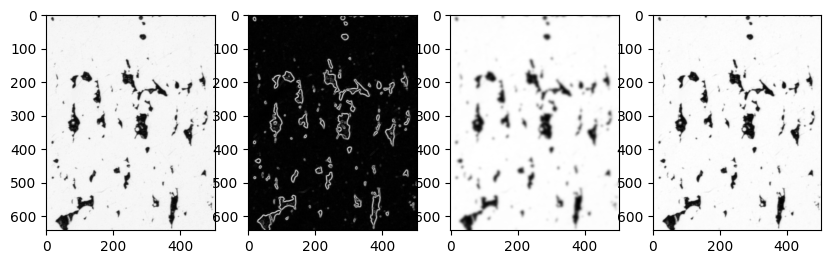

In [28]:
img_org = cv2.imread('/content/new_cropped_001.jpg')
##crop_img = img[y:y+h, x:x+w]  ## img.shape (1080, 1920, 3)
# img_org = img_org[:, 300:1600]  ## croped image used with only our data images
# img_org = img_org[:, 430:1490]  ## croped image used with only our data images   img.shape (1080, 1060, 3)
# img_org = img_org[45:1035,:]  ## croped image used with only our data images  img.shape (990, 1060, 3)
print('orginal image')
print('img.shape',img_org.shape)
cv2_imshow(img_org)

img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
print('gray image')
print('gray image.shape',img.shape)
cv2_imshow(img)

img2 = img.reshape(-1) ## reshape the image into single column
print('img2.shape',img2.shape)
df = pd.DataFrame()
t0 = time.time()   ## starting time

df['Original Image'] = img2

# # Generate Gabor features
# num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
# kernels = []
# for theta in range(2):   #Define number of thetas
#     theta = theta / 4. * np.pi
#     for sigma in (1, 3):  #Sigma with 1 and 3
#         for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
#             for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


#                 gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
# #                print(gabor_label)
#                 ksize=9
#                 kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
#                 kernels.append(kernel)
#                 #Now filter the image and add values to a new column
#                 fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
#                 filtered_img = fimg.reshape(-1)
#                 df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
#                 print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
#                 num += 1  #Increment for gabor column label

########################################
 #Gerate OTHER FEATURES out of pixels and add them to the data frame

#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

Kernal_size = 3

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=Kernal_size)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=Kernal_size)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe

feat_ext_time = time.time()-t0
local_time_feature_rxtraction = time.localtime(feat_ext_time)

# show some pf the feature images
import matplotlib.pyplot as plots
fig, axes = plots.subplots(1, 4, figsize=(10,10))
print('img.shape',img.shape)
print('img2.shape',img2.shape)

axes[0].imshow(np.asanyarray(df['Original Image']).reshape(img.shape), cmap=plots.cm.gray)
axes[1].imshow(np.asanyarray(df['Sobel']).reshape(img.shape), cmap=plots.cm.gray)
axes[2].imshow(np.asanyarray(df['Gaussian s3']).reshape(img.shape), cmap=plots.cm.gray)
axes[3].imshow(np.asanyarray(df['Median s3']).reshape(img.shape), cmap=plots.cm.gray)

#####################################################
# Threshold the image to obtain binary image
ret, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
# Find contours in the binary image
print('the binary image')
print('binary shape', binary.shape)
cv2_imshow(binary)

contours_test, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print('len main contours', len(contours_test))
max_cnt = max(contours_test, key = cv2.contourArea)
######################### new code
max_area = cv2.contourArea(max_cnt)
cnt_area_list = []
for f, contour in enumerate(contours):
    cnt_rect = cv2.minAreaRect(contour)
    cnt_area = cv2.contourArea(contour)
    cnt_area_list.append(cnt_area)
print('cnt_area_list',cnt_area_list)
area_list = [item for item in cnt_area_list if item < max_area]
area_list_1 = [item for item in area_list if item > 0]
median_area = np.median(area_list_1)

area_list_2 = [item for item in area_list_1 if item < median_area]
print('area after take the second median', area_list_2)
median_area_2 = np.median(area_list_2)
mean_area_2 = np.mean(area_list_2)
std_area_2 = np.std(area_list_2)
mean_minus_sd = mean_area_2 - 3*std_area_2
area_mean_plus_sd = mean_area_2 + 3*std_area_2
print('max_area_2',np.max(area_list_2))
print('min_area_2',np.min(area_list_2))
print('median_area_2',median_area_2)
print('mean_area_2',mean_area_2)
print('std_area_2',std_area_2)
print('mean_minus_sd',mean_minus_sd)
print('area_mean_plus_sd',area_mean_plus_sd)
print('count_process_pores',len(area_list_2))
######################### new code

# Create an empty binary mask for each contour
masks = [np.zeros(binary.shape, dtype=np.uint8) for _ in contours_test]
count_no_child = []
count_with_child = []
convexity_all_pores=[]
# Loop through each contour
for i, cnt in enumerate(contours_test):
    rect = cv2.minAreaRect(cnt)
    area = cv2.contourArea(cnt)
    if area != max_area and area > 2: # if the current contour area is not equal to workpiece area
      if hierarchy[0][i][2] == -1 and hierarchy[0][i][3] == 0: # Check if the contour has no child and the parent is the maximum contour=0
        count_no_child.append(1)
        (cx, cy), (w, h), angle = rect # No conversion required in the aspect ratio the unit divided
        aspect_ratio = max(w, h) / min(w, h)
        #print("aspect ratio", aspect_ratio)
        perimeter = cv2.arcLength(cnt, True)
        pore_circularities = 4 * np.pi * (area / (perimeter * perimeter))
        #print("pore_circularities", pore_circularities)
        # Get the shape of the contour
        ############### new
        hull_a = cv2.convexHull(cnt)
        # Calculate the convexity of the contour
        hull_area = cv2.contourArea(hull_a)
        convexity = hull_area / area
        solidity = float(area)/hull_area

        convexity_all_pores.append(convexity)
        ############### new
        if area > 0 and area < area_mean_plus_sd: # check by ploting which is having high %: 1sigma %, 2sgma %, 3sigma %
          annotation_test = 1 # process pore red color
          # print("Red i = ", i)
        elif pore_circularities >=  0.80 and area > area_mean_plus_sd:
          annotation_test = 2 ## Gas pore (circle) green color
       # elif aspect_ratio >= 3.5 and pore_circularities < 0.35:
        #elif aspect_ratio >= 3.5 and pore_circularities < 0.35:
        elif aspect_ratio >= 3.5 and pore_circularities < 0.35 and convexity < 0.35:
          annotation_test = 3 ## (1) crack pore (line) yellow color
        else:
          if convexity > 0.985 and convexity < 1.055: ## put convexity_mean_plus_minus_3sd
            annotation_test = 4  # blue color  (keyhole pores)
          else:
            annotation_test = 5   ## Turquoise color  (LOF pores)
      else: # Check if the contour is a pore (with child contours)
          # print("Pink i = ", i))
          count_with_child.append(1)
          annotation_test = 6   # (220, 0, 220) pink un-melted pore

      # Fill the mask with the annotation value
      cv2.drawContours(masks[i], [cnt], 0, annotation_test, -1)
      cv2.drawContours(masks[i], [cnt], 0, 0, 1)  # Add class 0 label (black border),  last parameter is the thickness of the contour line to be drawn
print('all pores convexity',convexity_all_pores)
print('count the contour without child', len(count_no_child))
print('count the contour with child', len(count_with_child))
# Combine all masks to create the final annotation image
annotation_test = np.zeros(binary.shape, dtype=np.uint8)
for mask in masks:
  annotation_test[mask > 0] = mask[mask > 0]

# Color the pixels belonging to each contour
colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255), 5: (48, 213, 200), 6: (220, 0, 220)}
annotated_img_test = np.zeros_like(img_org)

for annotation_value_test, color in colors.items():
  pixels_of_certain_type = np.argwhere(annotation_test == annotation_value_test)
  for x,y in pixels_of_certain_type:
    annotated_img_test[x, y] = np.array(color)


# Show the final annotated image
print('the annotated image')
print('annotated_img shape', annotated_img_test.shape)
##cv2_imshow(annotated_img)
plt.imsave('/content/labeled_test_img.jpg', annotated_img_test) ## see the saved labeled image
##plt.imshow(annotated_img_test)
##plt.axis('off')
##plt.show()

########################
labeled_img1 = annotation_test.reshape(-1) ### here is the change
print('labeled_img1 shape', labeled_img1.shape)
print('annotation shape', annotation.shape)

df['Labels'] = labeled_img1
#####################################
print('the unique labels', df['Labels'].unique())
print('the count of the unique labels', df['Labels'].value_counts())

#print("labeled_img1", labeled_img1[88600:88829])
#df.to_csv("before_removing_pixels_pixels_features_and_lables.csv")
# background_filtered = df[df['Labels'] == 0]
# print('background_filtered.shape',background_filtered.shape)
#df = df[df['Labels'] != 0] ## to remove the pixels of the background which not represensetive to our objects
print('df after remove background',df.shape)
###print(df.head())
df.to_csv("testing_image_pixels_features_and_lables.csv")

In [29]:
Y_test_image = df["Labels"].values
#Define the independent variables
X_test_image = df.drop(labels = ["Labels"], axis=1)

In [50]:
# to test with the balanced classes

X_test_image, Y_test_image = balanced_classes()

Technique of Up-sample minority class and Down-sample the majority class
using the same number of the pixels in Ellipse class==3 for all other classes
Label counts of all the classes in the test image 0    979461
5     45695
6     11275
2      4441
3      3546
1      2777
4      2205
Name: Labels, dtype: int64
The classes after up/down sampling:
0    60000
1    60000
2    60000
3    60000
4    60000
5    60000
6    60000
Name: Labels, dtype: int64


The CLF Random Forest_trained
Y_test_image [0 0 0 ... 0 0 0]
prediction_result [0 0 0 ... 0 0 0]
Accuracy on full image data =  94.856 %
the unique predicted labels [0 1 2 4 5 6]
unique predicted class: 0 Count: 292450
unique predicted class: 1 Count: 829
unique predicted class: 2 Count: 9712
unique predicted class: 4 Count: 16
unique predicted class: 5 Count: 9300
unique predicted class: 6 Count: 10619
Confusion Matrix [[292425     18    865      0   1145   2327]
 [     0    802     67      0    233      0]
 [     0      0   2367      0     88     11]
 [     5      0    261     16    397    411]
 [    14      9   5350      0   6709   3873]
 [     6      0    802      0    728   3997]]


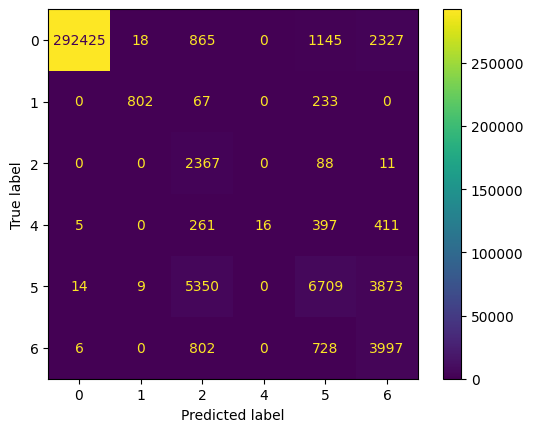

Label  0  accuracy =  0.9853258305815755
Label  1  accuracy =  0.7277676950998185
Label  2  accuracy =  0.9598540145985401
Label  4  accuracy =  0.014678899082568808
Label  5  accuracy =  0.42049514258853027
Label  6  accuracy =  0.7223929152358576
img.shape for segmented (642, 503)
img_org.shape for predicted image (642, 503, 3)
annotation_value 1
annotation_value 2
annotation_value 3
annotation_value 4
annotation_value 5
annotation_value 6
predicted_img shape (642, 503, 3)


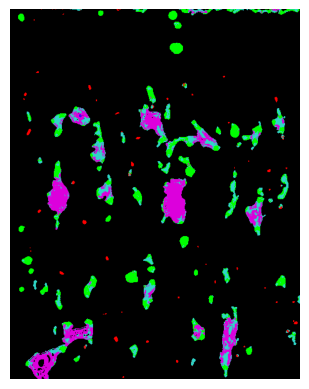

In [30]:
 # extract X from the new image
import os
models_path = "/content/CLF_res"
for model in os.listdir(models_path):  #iterate through each file
  print('The CLF', model)
  #To test the model on future datasets
  # loaded_model = pickle.load(open(filename, 'rb'))
  if (models_path + '/' + model) != '/content/CLF_res/.ipynb_checkpoints':
    loaded_model = pickle.load(open(models_path + '/' + model, 'rb'))
    prediction_result = loaded_model.predict(X_test_image)

    print('Y_test_image',Y_test_image)
    print('prediction_result', prediction_result)

    acc = metrics.accuracy_score(Y_test_image, prediction_result)*100
    print ("Accuracy on full image data = ", round(acc,3), '%')

    unique_values_pred, value_counts_pred = np.unique(prediction_result, return_counts=True)
    print('the unique predicted labels',  unique_values_pred)
    # Display the counts of each unique value
    for value, count in zip(unique_values_pred, value_counts_pred):
        print("unique predicted class:", value, "Count:", count)

    #Confusion Matrix
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    from sklearn import metrics
    confusion_matrix = metrics.confusion_matrix(Y_test_image, prediction_result)
    print('Confusion Matrix',confusion_matrix)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = loaded_model.classes_)
    cm_display.plot()
    plt.show()

    #Print individual accuracy values for each class, based on the confusion matrix
    ind_class_acc = confusion_matrix.diagonal()/confusion_matrix.sum(axis=1)
    for i in range(len(loaded_model.classes_)):
      print("Label ", loaded_model.classes_[i], " accuracy = ", ind_class_acc[i])

    #Right metric is ROC AUC
    #Starting version 0.23.1 you can report this for multilabel problems.
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

    # #For roc_auc_score in the multiclass case, these must be probability estimates which sum to 1.
    # prob_y_test = loaded_model.predict_proba(X_test_image)
    # print("ROC_AUC score for imbalanced data is:")
    # print(roc_auc_score(Y_test_image, prob_y_test, multi_class='ovr', labels=[0, 1, 2, 3]))

    print('img.shape for segmented',img.shape)
    print('img_org.shape for predicted image',img_org.shape)

    # # Color the pixels belonging to each contour
    colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255), 5: (48, 213, 200), 6: (220, 0, 220)}

    segmented = prediction_result.reshape((img.shape))

    predicted_img = np.zeros_like(img_org)

    for annotation_value, color in colors.items():
      print('annotation_value',annotation_value)
      pixels_of_certain_type = np.argwhere(segmented == annotation_value)
      #print('pixels_of_certain_type',pixels_of_certain_type)
      for x,y in pixels_of_certain_type:
        predicted_img[x, y] = np.array(color)

    plt.imshow(predicted_img)
    plt.axis('off')
    #cv2_imshow(predicted_img)
    print('predicted_img shape', predicted_img.shape)
    plt.imsave('/content/predicted_images/predicted_test_image_{}.jpg'.format(model), predicted_img)


